# Analytic Model with Arbitrary Impedance vs. FEM

- FENICS FEM Implementation
- Specific impedance $\zeta = 15$ for all surfaces
- L = [0.8, 0.5, 0.3] m

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pyrato.analytic as analytic

In [61]:
L = np.array([8, 5, 3])/10
zetas = np.ones((3, 2)) * 15

c = 343.9

k_max = 1e3*2*np.pi/c
k_min = 1*2*np.pi/c
k = np.linspace(k_min, k_max*1.1, 2**10)
freq = k*c/2/np.pi

In [62]:

r_R = np.array([3.3, 1.6, 1.8])/10
r_S = np.array([5.3, 3.6, 1.2])/10

k_ns, mode_indices = analytic.eigenfrequencies_rectangular_room_impedance(
    L, k, k_max, zetas, only_normal=True)

p_x = analytic.pressure_modal_superposition(
    k, k*c, k_ns, mode_indices, r_R, r_S, L, zetas)


In [69]:
p_x_fenics = np.loadtxt('fenics/New folder/p_R_fenics.csv', delimiter=',', dtype=np.complex)
ks_fenics = np.loadtxt('fenics/New folder/ks_fenics.csv', delimiter=',')

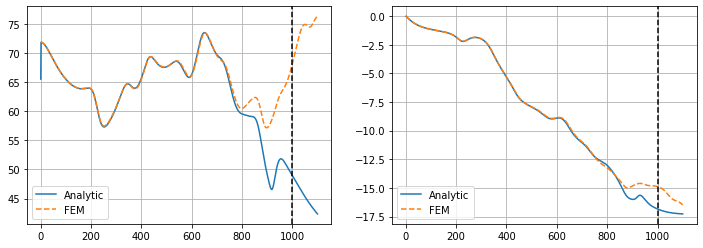

In [74]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(freq, 20*np.log10(np.abs(p_x)), label='Analytic')
plt.plot(ks_fenics*c/2/np.pi, 20*np.log10(np.abs(p_x_fenics*np.sqrt(2))), linestyle='--', label='FEM')
plt.axvline(k_max*c/2/np.pi, color='k', linestyle='--')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(freq, np.unwrap(np.angle(p_x)), label='Analytic')
plt.plot(ks_fenics*c/2/np.pi, np.unwrap(np.angle(p_x_fenics.conj()))+np.pi/4, linestyle='--', label='FEM')

plt.axvline(k_max*c/2/np.pi, color='k', linestyle='--')
plt.grid(True)
plt.legend()

# Notes

- FENICS does compute the effective value instead of peak values, needs factor of $\sqrt{2}$
- FENICS phase is rising, probably $\exp{(\omega t)}$ sign convention
- FENICS phase is off by $1/4\pi$, why does this happen?

# Create Test Data

In [86]:
L = np.array([8, 5, 3])/10
zetas = np.ones((3, 2)) * 15

c = 343.9

k_max = 1e3*2*np.pi/c
k_min = 150*2*np.pi/c
k = np.linspace(k_min, k_max*1.1, 2**10)
freq = k*c/2/np.pi

k_ns, mode_indices = analytic.eigenfrequencies_rectangular_room_impedance(
    L, k, k_max, zetas, only_normal=True)

In [88]:
np.savetxt('../data/analytic_impedance/k_ns_x_zeta15.csv', k_ns[0], delimiter=',')
np.savetxt('../data/analytic_impedance/k_ns_y_zeta15.csv', k_ns[1], delimiter=',')
np.savetxt('../data/analytic_impedance/k_ns_z_zeta15.csv', k_ns[2], delimiter=',')
np.savetxt('../data/analytic_impedance/mode_indices_zeta15.csv', mode_indices, delimiter=',', fmt="%d")

In [89]:

r_R = np.array([3.3, 1.6, 1.8])/10
r_S = np.array([5.3, 3.6, 1.2])/10



p_x = analytic.pressure_modal_superposition(
    k, k*c, k_ns, mode_indices, r_R, r_S, L, zetas)


In [90]:
np.savetxt('../data/analytic_impedance/p_x_zeta15.csv', p_x, delimiter=',')